In [1]:
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn import preprocessing
import logistic_regression as lr
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp

In [2]:
#dir_transfer = '../../tissue_spec_tl/
dir_transfer = '../src/11.15.with_simulation_transfer_'
dir_notransfer = '../src/11.15.with_simulation_notransfer_'
datasets = ['.1k/', '.5k/', '1k/', '2.5k/', '5k/', '7.5k/']
tissues = ['brain', 'digestive', 'muscle', 'group1', 'epithelial']
auc_transfer = []
auc_notransfer = []
for dataset in datasets:
    path_transfer = dir_transfer + dataset
    path_notransfer = dir_notransfer + dataset
    # read in data
    transfer_model = pd.read_csv(str(path_transfer) + 'test.csv')
    no_transfer_model = pd.read_csv(str(path_notransfer) + 'test.csv')
    auc_tissues_transfer = []
    auc_tissues_notransfer = []
    for tissue in tissues:
        data = transfer_model[transfer_model["tissue"] == tissue]
        auc_tissues_transfer.append(sklearn.metrics.roc_auc_score(data["z_labels"], data["posterior"]))
        
        data = no_transfer_model[no_transfer_model["tissue"] == tissue]
        auc_tissues_notransfer.append(sklearn.metrics.roc_auc_score(data["z_labels"], data["posterior"]))
    auc_transfer.append(np.mean(auc_tissues_transfer))
    auc_notransfer.append(np.mean(auc_tissues_notransfer))

OSError: File b'../src/11.15.with_simulation_transfer_.1k/test.csv' does not exist

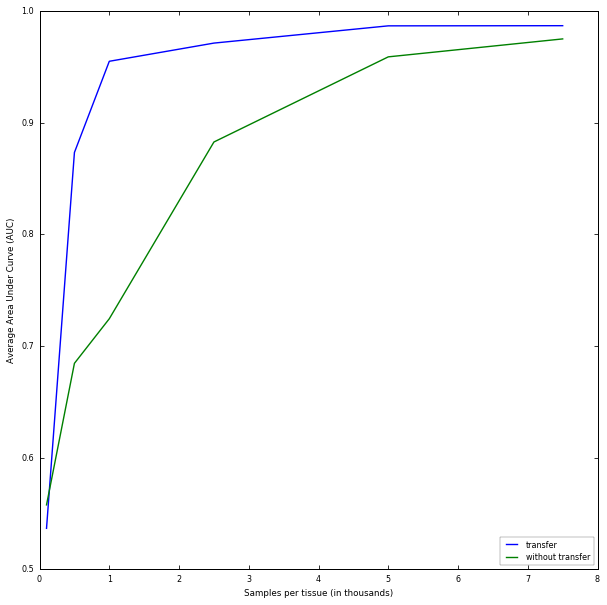

In [46]:
%matplotlib inline
x_labels = [.1, .5, 1, 2.5, 5, 7.5]
plt.style.use("seaborn-paper")
plt.figure(figsize=(10,10))
plt.plot(x_labels, auc_transfer, label='transfer')
plt.plot(x_labels, auc_notransfer, label='without transfer')
plt.xlabel("Samples per tissue (in thousands)")
plt.ylabel("Average Area Under Curve (AUC)")
plt.legend(loc='lower right')